In [18]:
'''
For simplicity and practice purposes, 
the dataset is not split into training and test sets in this notebook.
'''

'\nFor simplicity and practice purposes, \nthe dataset is not split into training and test sets in this notebook.\n'

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

np.random.seed(42)
sns.set_theme(font_scale=1.3)

In [14]:
from sklearn.datasets import load_iris

all_data = load_iris(as_frame=True)
data = all_data['data']
target = all_data['target']

all_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
print(all_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [4]:
df = all_data.frame

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [6]:
df.value_counts()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  target
5.8                2.7               5.1                1.9               2         2
6.2                2.2               4.5                1.5               1         1
                   2.9               4.3                1.3               1         1
                   3.4               5.4                2.3               2         1
6.3                2.3               4.4                1.3               1         1
                                                                                   ..
5.4                3.9               1.3                0.4               0         1
                                     1.7                0.4               0         1
5.5                2.3               4.0                1.3               1         1
                   2.4               3.7                1.0               1         1
7.9                3.8               6.4                2.0

In [7]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

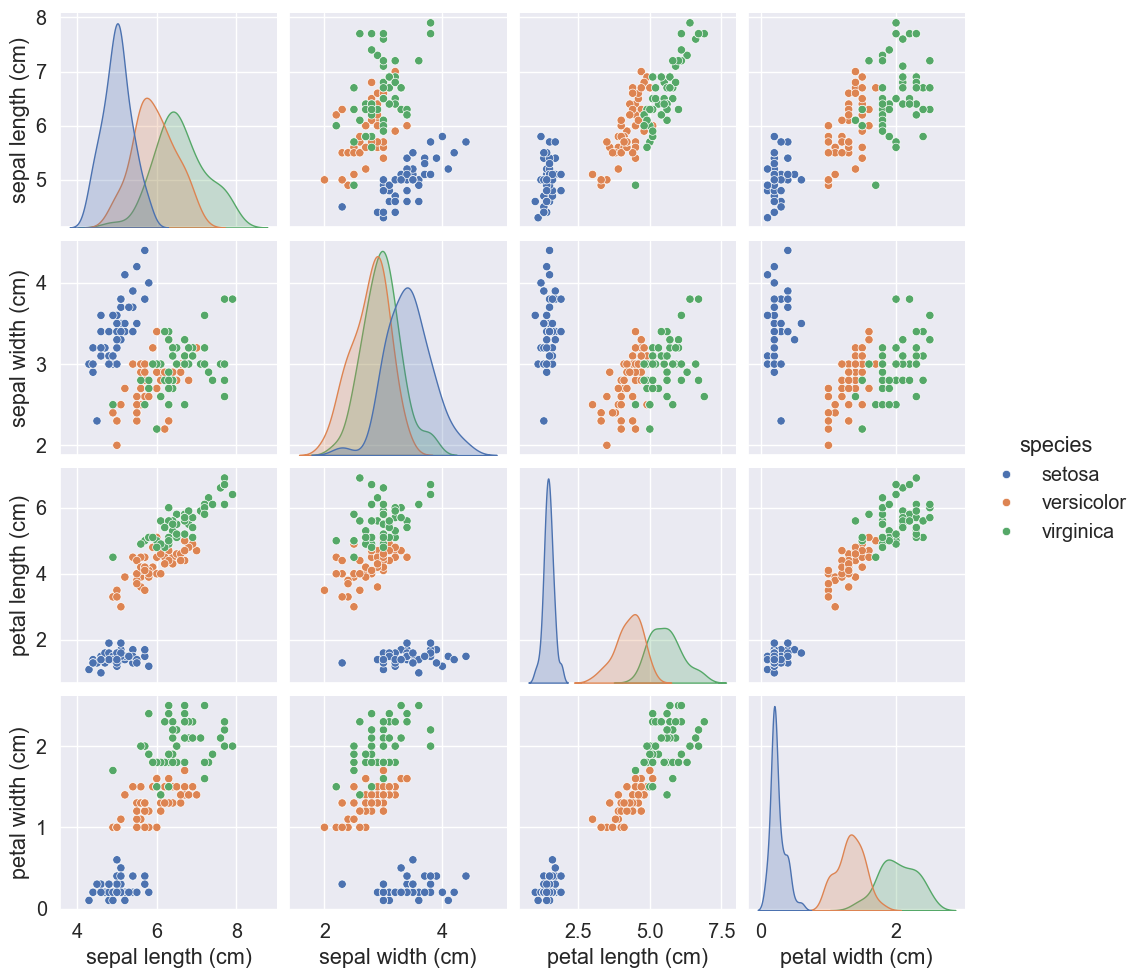

In [8]:
df['species'] = df['target'].map({
    0: all_data['target_names'][0], 
    1: all_data['target_names'][1], 
    2: all_data['target_names'][2],
})
_ = sns.pairplot(df, vars=all_data['feature_names'],hue='species')


In [9]:
df.corr(numeric_only=True)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


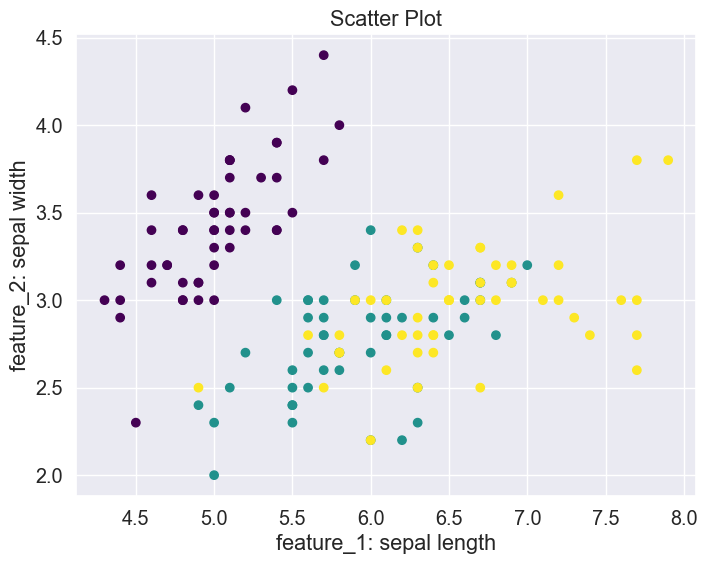

In [15]:
# data = data[:, :2]
plt.figure(figsize=(8, 6))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=target, cmap='viridis')
plt.title('Scatter Plot')
plt.xlabel('feature_1: sepal length')
plt.ylabel('feature_2: sepal width')
plt.show()
           

In [17]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(data, target)

KNeighborsClassifier()